<a href="https://colab.research.google.com/github/muppallakarthiksai2000/Karthiksai_ML/blob/main/MuppallaKarthikSai_(22501A1275)Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Heart Disease Prediction Using Logistic Regression**

**Step 1:** Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

**Step 2:** Mounting drive into the colab notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step 3:** Reading data from the drive

In [ ]:
heart=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


##Data Preprocessing

**Step 4:** Analysing the dataset.

1. shape of the graph
2. columns of the graphs.
3. checking null values
4. checking the presence of duplicates
5. checking mean,min,etc. using describe function.

In [ ]:
#shape of the graph
heart.shape

(918, 12)

In [ ]:
#columns of the graphs.
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
#checking null values
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
heart.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


**Step 5:** Dividing numerical and categorial data
1. Here the value which are unique in the categorical data are atmost 4.
2. So if we calculate the unique value count and get more than 6(let's consider) then we can consider it as numerical data else categorical.

In [ ]:
col = list(heart.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(heart[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


**Step 6:** creating a deep copy of our data set and converting all the columns to numerical values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
deep_copy_heart = heart.copy(deep = True)

deep_copy_heart['Sex'] = le.fit_transform(deep_copy_heart['Sex'])
deep_copy_heart['ChestPainType'] = le.fit_transform(deep_copy_heart['ChestPainType'])
deep_copy_heart['RestingECG'] = le.fit_transform(deep_copy_heart['RestingECG'])
deep_copy_heart['ExerciseAngina'] = le.fit_transform(deep_copy_heart['ExerciseAngina'])
deep_copy_heart['ST_Slope'] = le.fit_transform(deep_copy_heart['ST_Slope'])

In [ ]:
deep_copy_heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


##Data Visualization

**Step 7:** visualizing the count of the total no. of heart diseased people along with people without heart disease

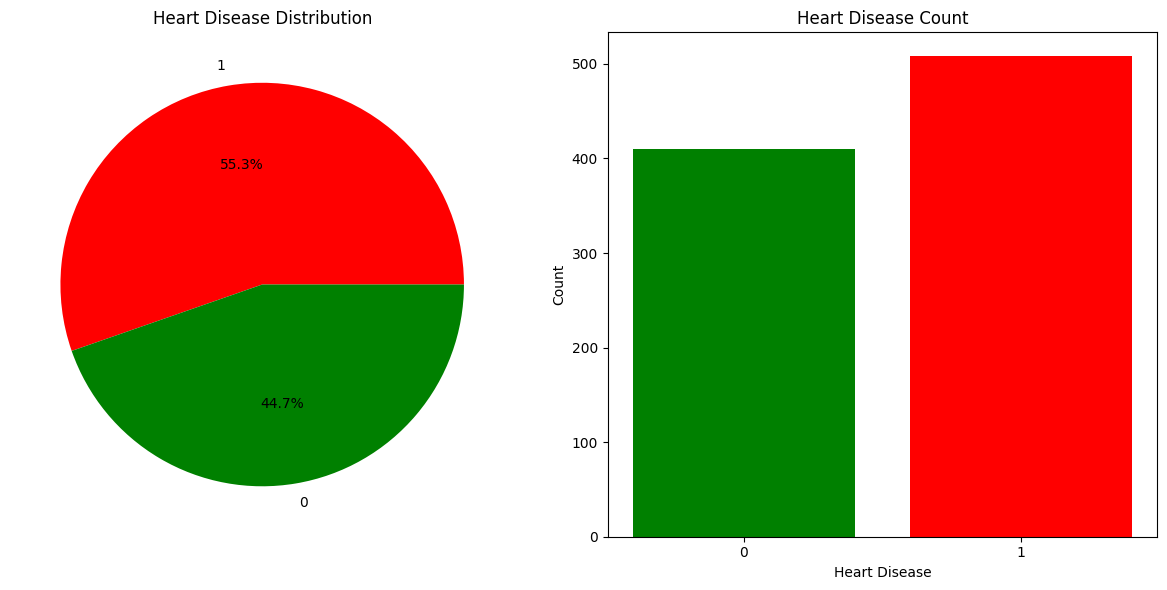

In [ ]:
heart_disease_counts = heart['HeartDisease'].value_counts()

# Define the colors. '1' for heart disease is red, '0' for healthy heart is any other color (e.g., green)
colors = ['red' if label == 1 else 'green' for label in heart_disease_counts.index]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Create a pie chart
axs[0].pie(heart_disease_counts, labels = heart_disease_counts.index, colors = colors, autopct='%1.1f%%')
axs[0].set_title('Heart Disease Distribution')

# Create a bar graph
axs[1].bar(heart_disease_counts.index, heart_disease_counts, color = colors)
axs[1].set_xlabel('Heart Disease')
axs[1].set_ylabel('Count')
axs[1].set_title('Heart Disease Count')
axs[1].set_xticks(heart_disease_counts.index)

plt.tight_layout()
plt.show()

**Step 7:** Aanalysing the data by plotting graph for different scenario.

In [ ]:
data=heart

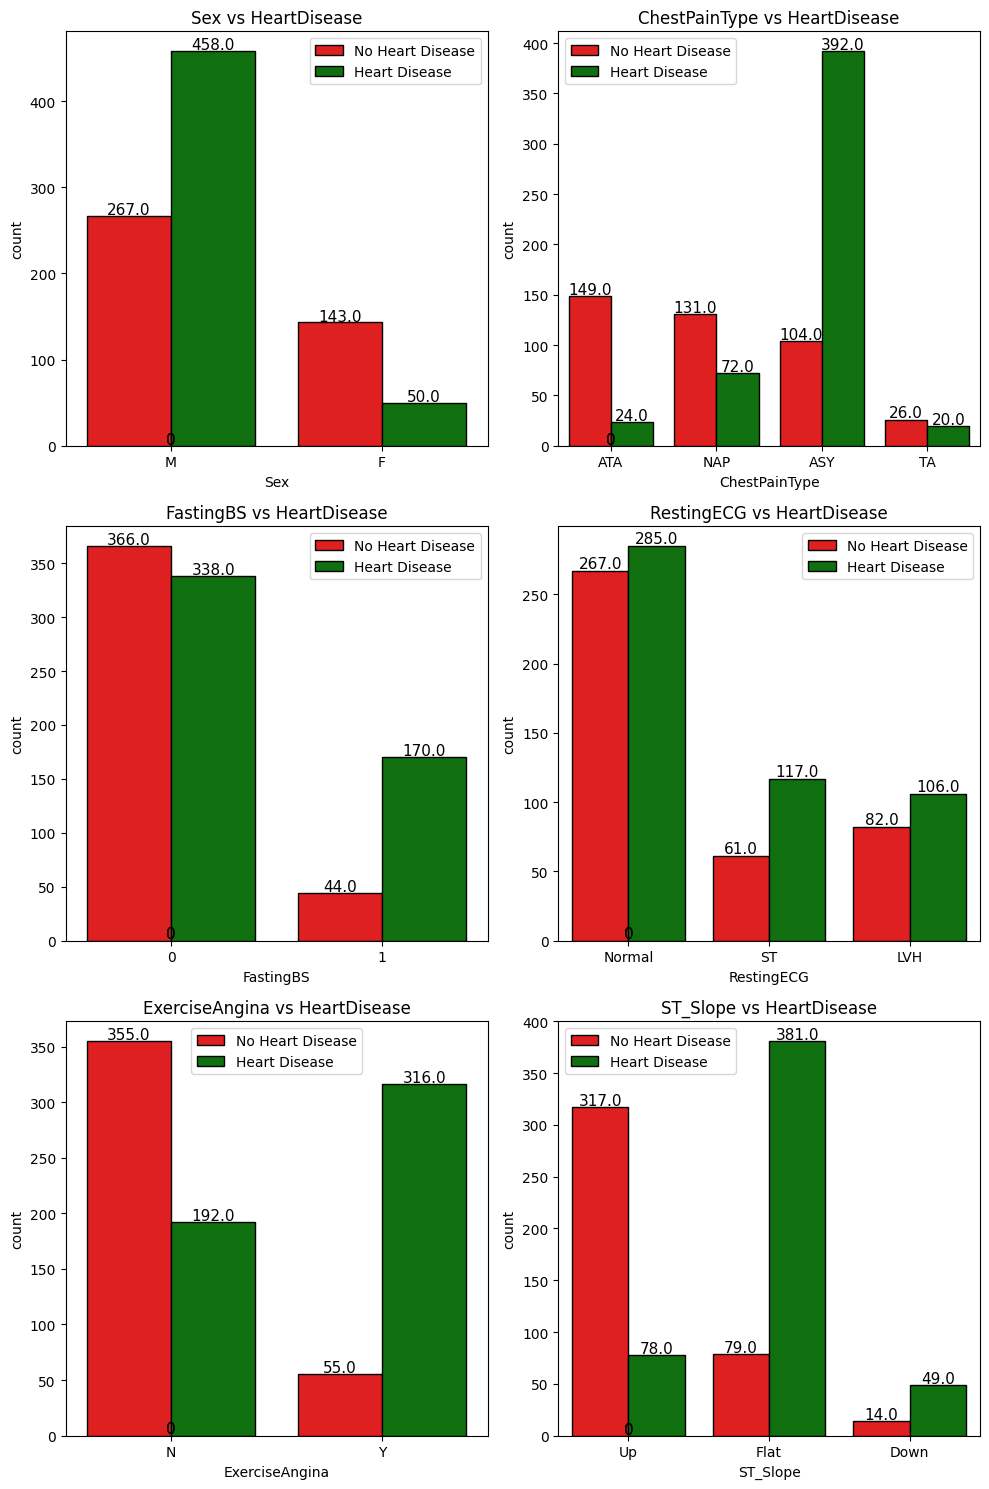

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 15))
for i in range(len(categorical_features) - 1):
    ax = plt.subplot(3, 2, i+1)
    sns.countplot(x=categorical_features[i], data=data, hue="HeartDisease", palette=colors, edgecolor='black', ax=ax)
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = categorical_features[i] + ' vs HeartDisease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title)
plt.tight_layout()
plt.show()


/tmp/ipython-input-21-529172562.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]
/tmp/ipython-input-21-529172562.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]
/tmp/ipython-input-21-529172562.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  restecg = [restecg[0] / sum(res

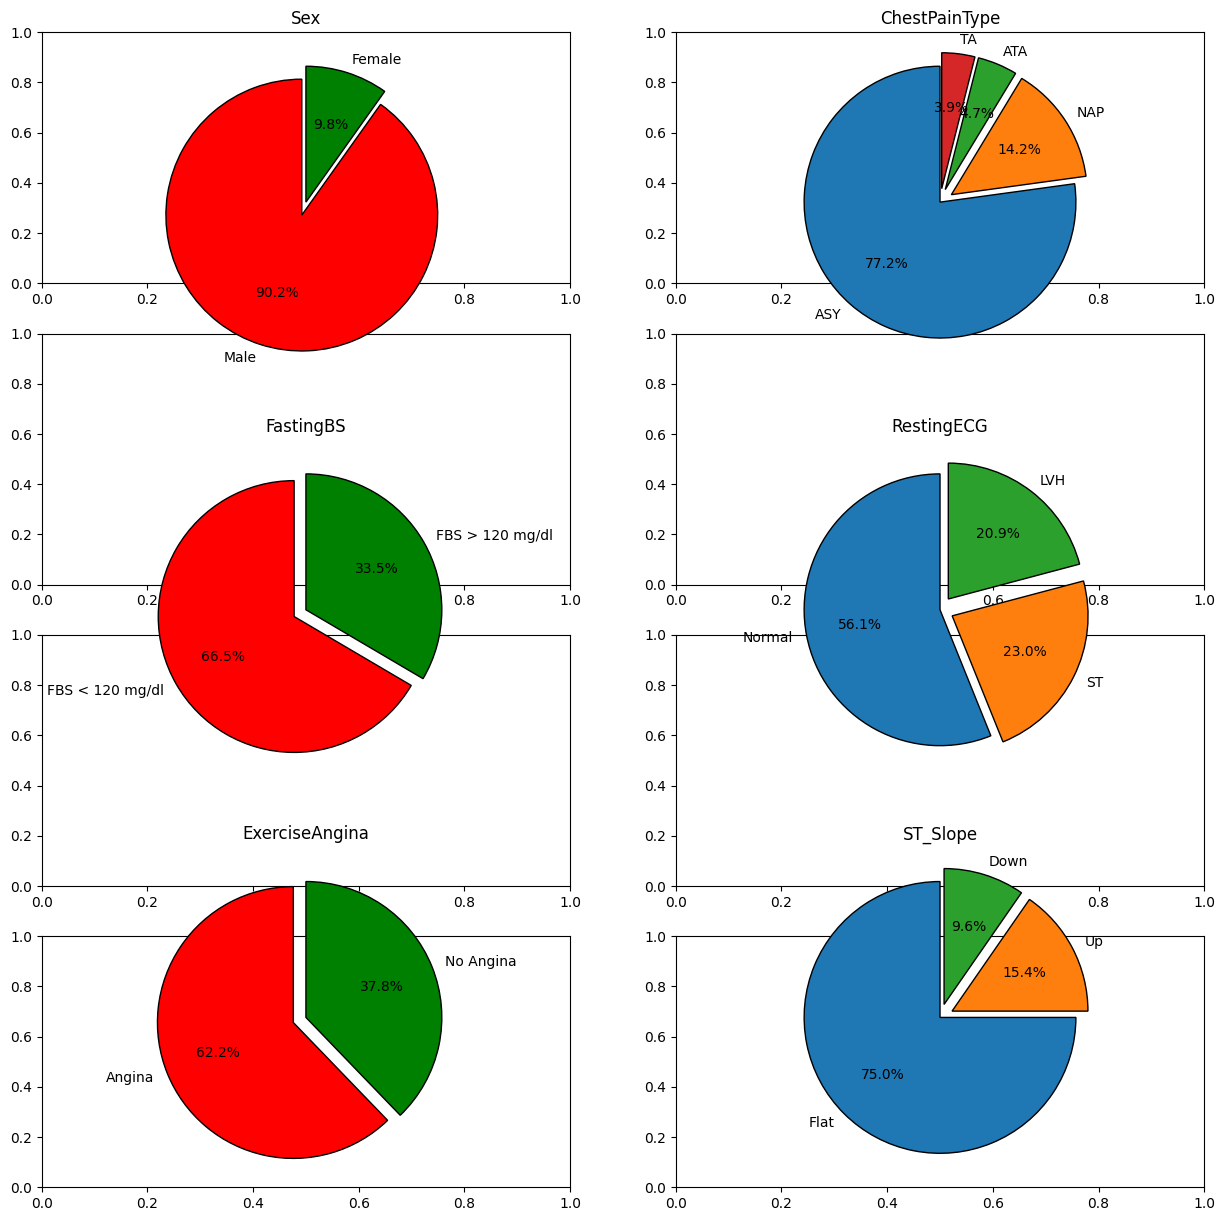

In [ ]:
sex = heart[heart['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = heart[heart['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = heart[heart['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = heart[heart['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = heart[heart['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = heart[heart['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]
ax,fig = plt.subplots(nrows = 4,ncols = 2,figsize = (15,15))

plt.subplot(3,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(3,2,2)
plt.pie(cp,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ChestPainType');

plt.subplot(3,2,3)
plt.pie(fbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('FastingBS');

plt.subplot(3,2,4)
plt.pie(restecg,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('RestingECG');

plt.subplot(3,2,5)
plt.pie(exang,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ExerciseAngina');

plt.subplot(3,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ST_Slope');


**Step 8:** Splitting the data as training set and testing set.

In [ ]:
X= deep_copy_heart.iloc[:, :-1].values
Y=deep_copy_heart.iloc[:, 11].values

In [ ]:
features = deep_copy_heart[deep_copy_heart.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = deep_copy_heart['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

##Logistic Regression and testing accuracy

In [ ]:
predictor= LogisticRegression()

In [ ]:
predictor.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#accuracy of train data
predict_train=predictor.predict(x_train)
training_accuracy = accuracy_score(predict_train,y_train)

In [ ]:
print('Accuracy on the training data is: ', training_accuracy)

Accuracy on the training data is:  0.8583106267029973


In [ ]:
predict_test=predictor.predict(x_test)
testing_accuracy = accuracy_score(predict_test,y_test)

In [ ]:
print('Accuracy on the testing data is: ', testing_accuracy)

Accuracy on the testing data is:  0.8641304347826086


<Axes: >

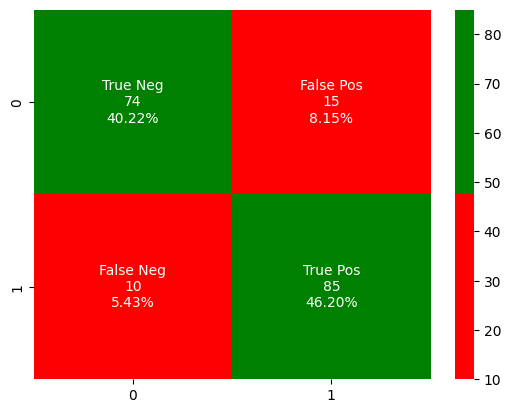

In [ ]:
cm = confusion_matrix(y_test,predictor.predict(x_test))
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')

In [ ]:
print('Accuracy on the testing data is: ', testing_accuracy)

Accuracy on the testing data is:  0.8641304347826086
